Load in the `wine` data set, and create a binary classification problem with just two features (for plotting purposes).

This routine assumes that your directory contains the file `wine.data.txt`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#
# Load in wine data: 178 instances, 3 classes
#
data = np.loadtxt('wine.data.txt', delimiter=',')
ax = data[0:178,1:14]
ay = data[0:178,0]
#
# Now get indices of classes 1 and 2: total of 130 instances
# Let x,y be the data and labels for just those instances
#
I1 = (ay == 1)
I2 = (ay == 2)
I = I1 + I2
x = ax[I,:]
y = ay[I]
#
# Use just two features:
# Alcohol level (feature 0) and hue (feature 10)
#
features = (0,10)
x = x[:,features]

Now plot the points to see what they look like.

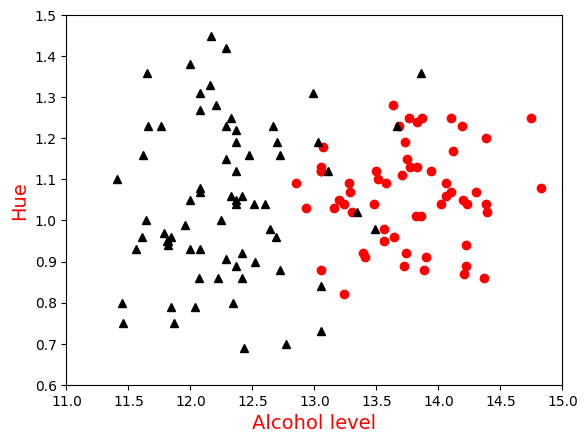

In [2]:
x_min, x_max = 11.0, 15.0
y_min, y_max = 0.6, 1.5
plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
plt.plot(x[(y==2),0], x[(y==2),1], 'k^')
plt.xlabel('Alcohol level', fontsize=14, color='red')
plt.ylabel('Hue', fontsize=14, color='red')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.yticks([0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5])
plt.show()

Next, let's train a linear SVM. We'll just use default parameters.

In [3]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x,y)

SVC(kernel='linear')

Identify the support vectors so that they can be highlighted in the subsequent plot.


In [4]:
sv = np.zeros(130,dtype=bool)
sv[clf.support_] = True
notsv = np.logical_not(sv)

Now let's plot the decision boundary, along with the data points, drawing the support vectors slightly larger than the other points.

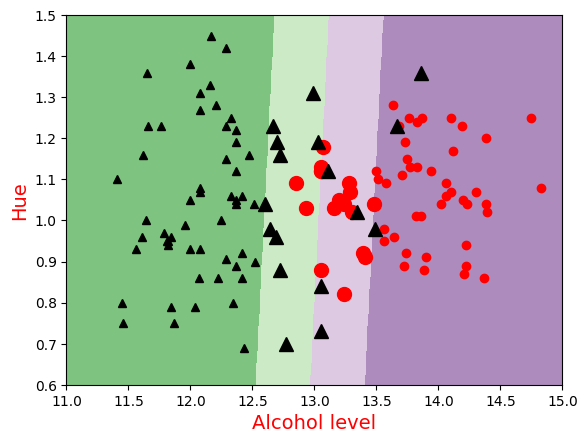

In [5]:
delta = 0.005
x_min, x_max = 11.0, 15.0
y_min, y_max = 0.6, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
for i in range(len(Z)):
    Z[i] = min(Z[i],1.0)
    Z[i] = max(Z[i],-1.0)
    if (Z[i] > 0.0) and (Z[i] < 1.0):
        Z[i] = 0.5
    if (Z[i] < 0.0) and (Z[i] > -1.0):
        Z[i] = -0.5
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)

# Plot also the training points
plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
plt.plot(x[(y==2)*notsv,0], x[(y==2)*notsv,1], 'k^')
plt.plot(x[(y==2)*sv,0], x[(y==2)*sv,1], 'k^', markersize=10)
plt.xlabel('Alcohol level', fontsize=14, color='red')
plt.ylabel('Hue', fontsize=14, color='red')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.yticks([0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5])
plt.show()

NameError: name 'svm_x' is not defined